# Syrian Migrantion Flows 

#### Source: UNHR Data on Syrian Refugee and Asylum 

In [49]:
suppressPackageStartupMessages({library(ggplot2) 
library(plotly)
library(readr) 
library(tidyverse)
library(dplyr)
library(tidyr)                                
library(gridExtra)
library(grid)
library(ggthemes)
library(RColorBrewer)
library(reshape)
library(stringr)    
library(lubridate)
library(viridis)
library(networkD3)
library(igraph)                                
})

# read in the data set and view it 
unhcr <- read_csv("../experimental/data/unhcr_refugee.csv")

# clean up the names of the columns 
colnames(unhcr) <- c("Year", "Country", "Origin", "Refugees", "Asylum", "Returned", "IDP", "Returned_IDP", "Stateless", "Other", "Total")

# clen up our column data types
unhcr$Refugees <- as.numeric(as.character(unhcr$Refugees))
unhcr$Asylum <- as.numeric(as.character(unhcr$Asylum))
unhcr$Returned <- as.numeric(as.character(unhcr$Returned))
unhcr$Other <- as.numeric(as.character(unhcr$Other))
unhcr$Total <- as.numeric(as.character(unhcr$Total))

# set the na values to zero 
unhcr[is.na(unhcr)] <- 0

# copy the data frame 
data <- unhcr

# since we are only interested in Syrians we're going to subset our data 
unhcr <- unhcr[unhcr$Origin >= "Syrian Arab Rep.",]
names(unhcr)

Parsed with column specification:
cols(
  Year = col_integer(),
  `Country / territory of asylum/residence` = col_character(),
  Origin = col_character(),
  `Refugees (incl. refugee-like situations)` = col_character(),
  `Asylum-seekers (pending cases)` = col_character(),
  `Returned refugees` = col_character(),
  `Internally displaced persons (IDPs)` = col_integer(),
  `Returned IDPs` = col_integer(),
  `Stateless persons` = col_integer(),
  `Others of concern` = col_character(),
  `Total Population` = col_character()
)
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

[1] "Year"         "Country"      "Origin"       "Refugees"     "Asylum"      
 [6] "Returned"     "IDP"          "Returned_IDP" "Stateless"    "Other"       
[11] "Total"

In [50]:
# Explore the data
str(unhcr)

summary(unhcr)

Classes 'tbl_df', 'tbl' and 'data.frame':	507 obs. of  11 variables:
 $ Year        : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ Country     : chr  "Angola" "Albania" "United Arab Emirates" "Argentina" ...
 $ Origin      : chr  "Syrian Arab Rep." "Syrian Arab Rep." "Syrian Arab Rep." "Syrian Arab Rep." ...
 $ Refugees    : num  0 0 16 159 11090 ...
 $ Asylum      : num  1 15 14 12 42 ...
 $ Returned    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ IDP         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Returned_IDP: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Stateless   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Other       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Total       : num  1 15 30 171 11132 ...


      Year        Country             Origin             Refugees      
 Min.   :2013   Length:507         Length:507         Min.   :      0  
 1st Qu.:2014   Class :character   Class :character   1st Qu.:      3  
 Median :2015   Mode  :character   Mode  :character   Median :     23  
 Mean   :2015                                         Mean   :  33044  
 3rd Qu.:2016                                         3rd Qu.:    501  
 Max.   :2016                                         Max.   :2823987  
     Asylum            Returned           IDP           Returned_IDP   
 Min.   :     0.0   Min.   :     0   Min.   :      0   Min.   :     0  
 1st Qu.:     1.0   1st Qu.:     0   1st Qu.:      0   1st Qu.:     0  
 Median :    10.0   Median :     0   Median :      0   Median :     0  
 Mean   :  1095.9   Mean   :   278   Mean   :  53339   Mean   :  1183  
 3rd Qu.:   126.5   3rd Qu.:     0   3rd Qu.:      0   3rd Qu.:     0  
 Max.   :100527.0   Max.   :140756   Max.   :7632500   Max.   :6

### Start Exploring the Dataset 

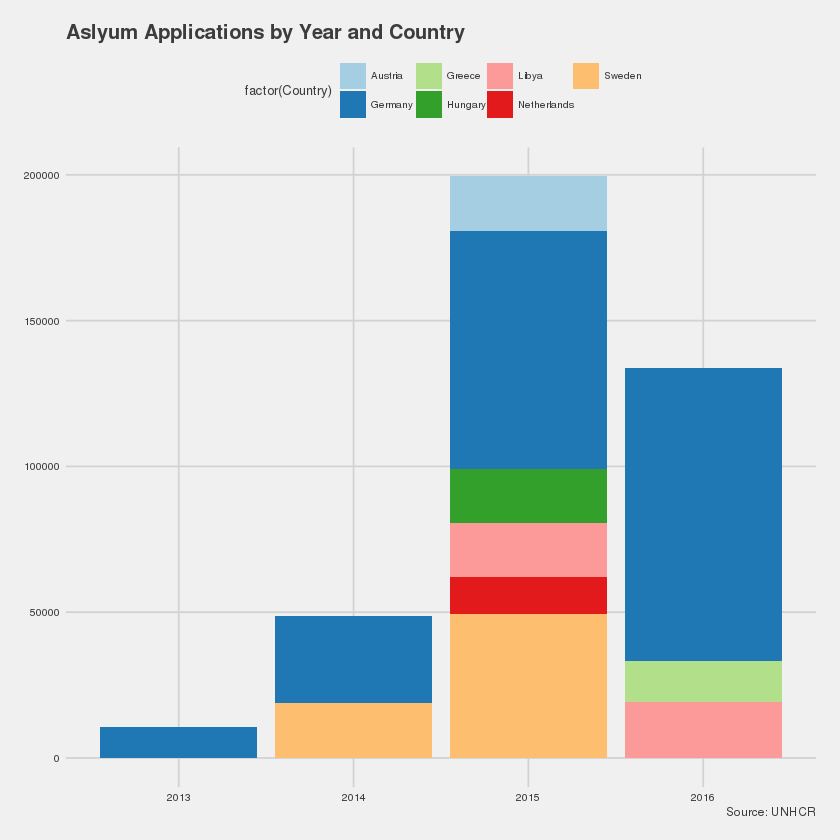

In [65]:
# group the data by route and sum by date column
sums <- unhcr %>% 
  group_by(Country, Year) %>% 
  summarise(total = sum(Asylum))

#head(sums)

sub <- sums[sums$total >= 10000,]


ggplot(data=sub, aes(x=Year, y=total, fill=factor(Country))) +
  geom_bar(stat="identity")+
#  scale_color_brewer(name='',palette='Set1') + 
  scale_fill_brewer(palette="Paired")+
  theme_fivethirtyeight(base_size = 8, base_family = "sans") + 
  theme(legend.position='top', legend.text=element_text(size=6)) + 
  ggtitle("Syrian Aslyum Applications by Year and Country") +
  labs(caption = "Source: UNHCR") 

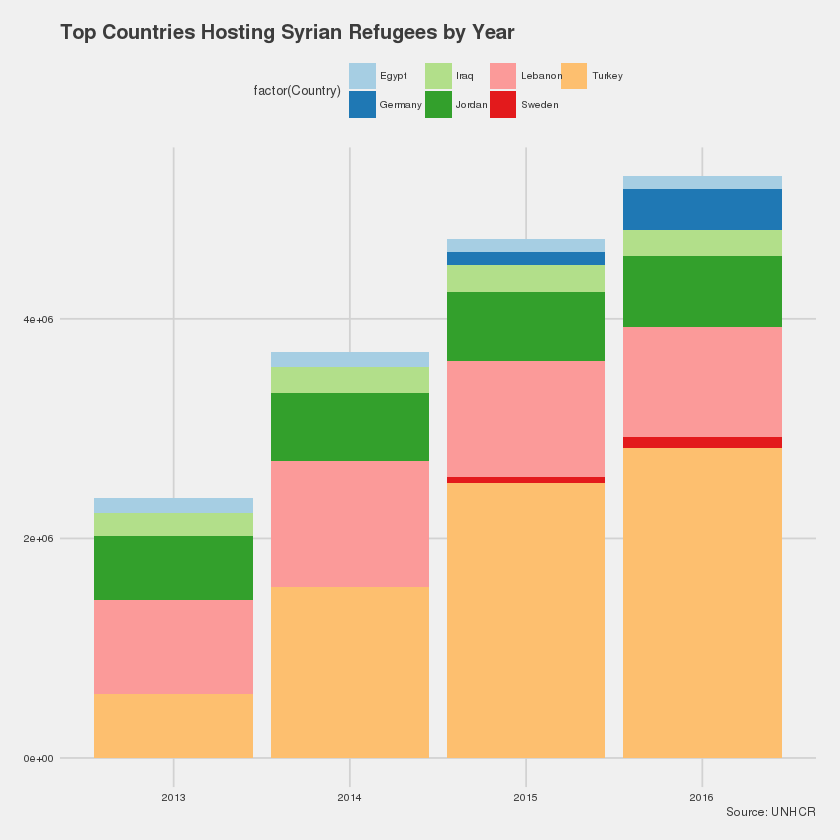

In [69]:
# group the data by route and sum by date column
ref <- unhcr %>% 
  group_by(Country, Year) %>% 
  summarise(total = sum(Refugees))

#head(sums)

ref_sub <- ref[ref$total >= 50000,]


ggplot(data=ref_sub, aes(x=Year, y=total, fill=factor(Country))) +
  geom_bar(stat="identity")+
#  scale_color_brewer(name='',palette='Set1') + 
  scale_fill_brewer(palette="Paired")+
  theme_fivethirtyeight(base_size = 8, base_family = "sans") + 
  theme(legend.position='top', legend.text=element_text(size=6)) + 
  ggtitle("Top Countries Hosting Syrian Refugees by Year") +
  labs(caption = "Source: UNHCR") 

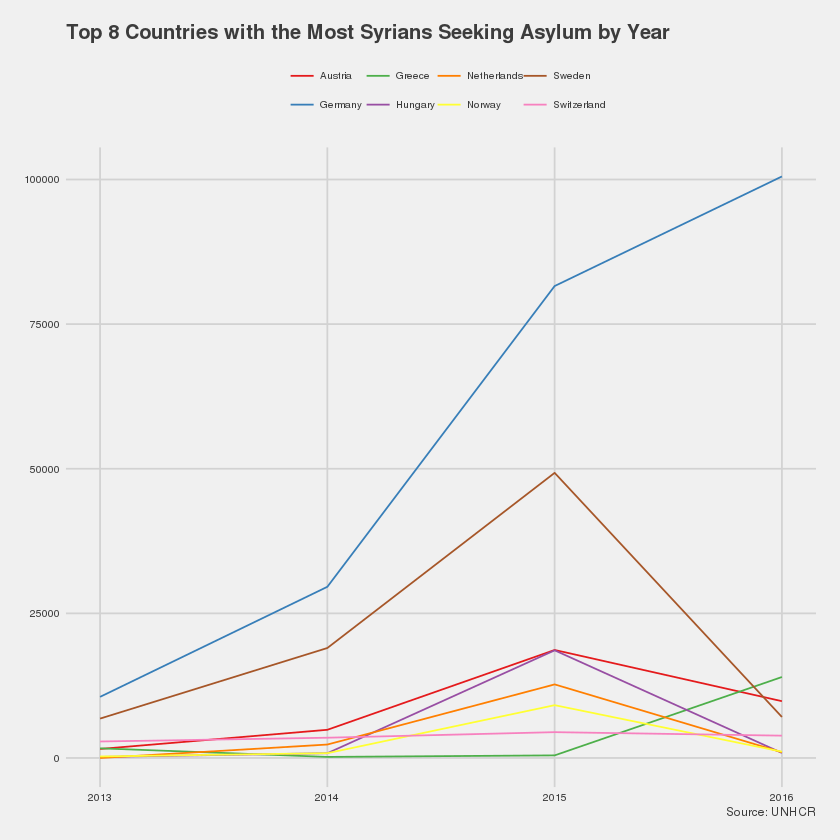

In [52]:
data <- sums[(sums$Country == "Germany") | (sums$Country == "Austria") |
             (sums$Country == "Sweden") | (sums$Country == "Greece") |
             (sums$Country == "Hungary") | (sums$Country == "Netherlands") |
             (sums$Country == "Switzerland") | (sums$Country == "Norway"), ]   


ggplot(data=data, aes(x=Year, y=total, color=Country)) +
  geom_line(stat="identity")+
  scale_color_brewer(name='',palette='Set1') + 
#  scale_fill_brewer(palette="Paired")+
  theme_fivethirtyeight(base_size = 8, base_family = "sans") + 
  theme(legend.position='top', legend.text=element_text(size=6)) + 
  ggtitle("Top 8 Countries with the Most Syrians Seeking Asylum by Year") +
  labs(caption = "Source: UNHCR") 

#  facet_grid(. ~ Country)

### Syrian Refugee Flows 

[1] "Syrian Arab Rep." "Armenia"          "Austria"          "Bulgaria"        
 [5] "Denmark"          "Egypt"            "Germany"          "Iraq"            
 [9] "Jordan"           "Lebanon"          "Libya"            "Netherlands"     
[13] "Sweden"           "Turkey"

HTML widgets cannot be represented in plain text (need html)

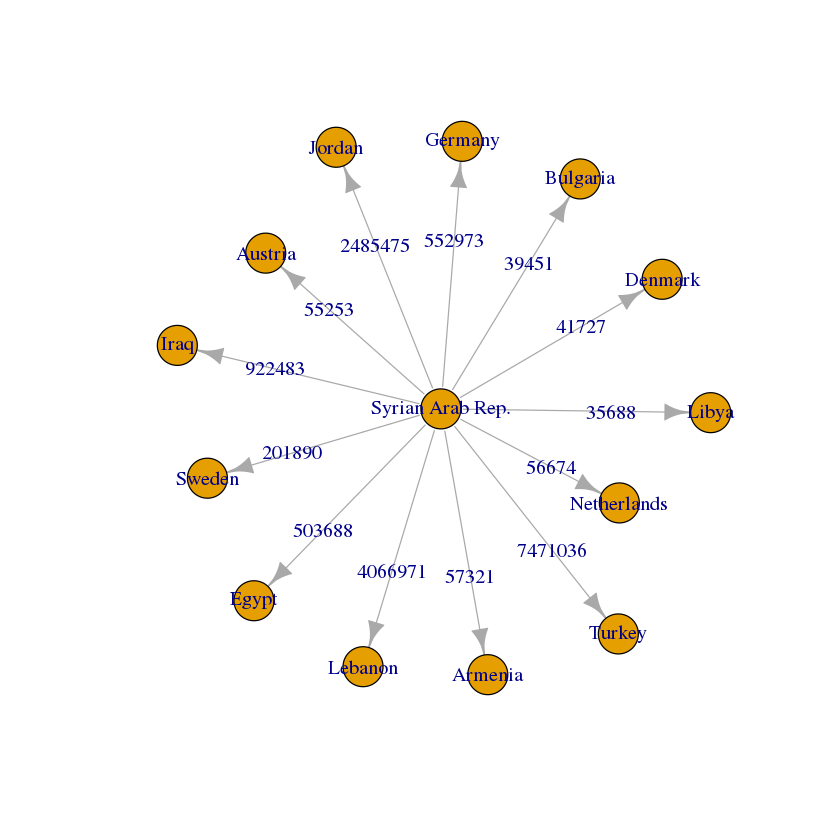

In [53]:
newdat <- unhcr %>% 
  group_by(Origin, Country) %>% 
  summarise(Refugees = sum(Refugees))

newsub <- newdat[newdat$Refugees >= 29000,]

met <- newsub[c(1,2,3)]
nw <- graph.data.frame(met, directed=TRUE)
plot(nw, edge.label = E(nw)$Refugees)

ad <- as_adjacency_matrix(nw,type="both",names=TRUE,sparse=FALSE,attr="Refugees");
V(nw)$name

chordNetwork(Data = ad, width = 700, height = 700, fontSize = 14, labels = V(nw)$name, labelDistance = 100)

### Syrian Asylum Flows

[1] "Syrian Arab Rep."         "Algeria"                 
 [3] "Austria"                  "Belgium"                 
 [5] "Bulgaria"                 "Cyprus"                  
 [7] "France"                   "Germany"                 
 [9] "Greece"                   "Hungary"                 
[11] "Libya"                    "Malaysia"                
[13] "Netherlands"              "Norway"                  
[15] "Spain"                    "Sweden"                  
[17] "Switzerland"              "United Kingdom"          
[19] "United States of America" "Yemen"

HTML widgets cannot be represented in plain text (need html)

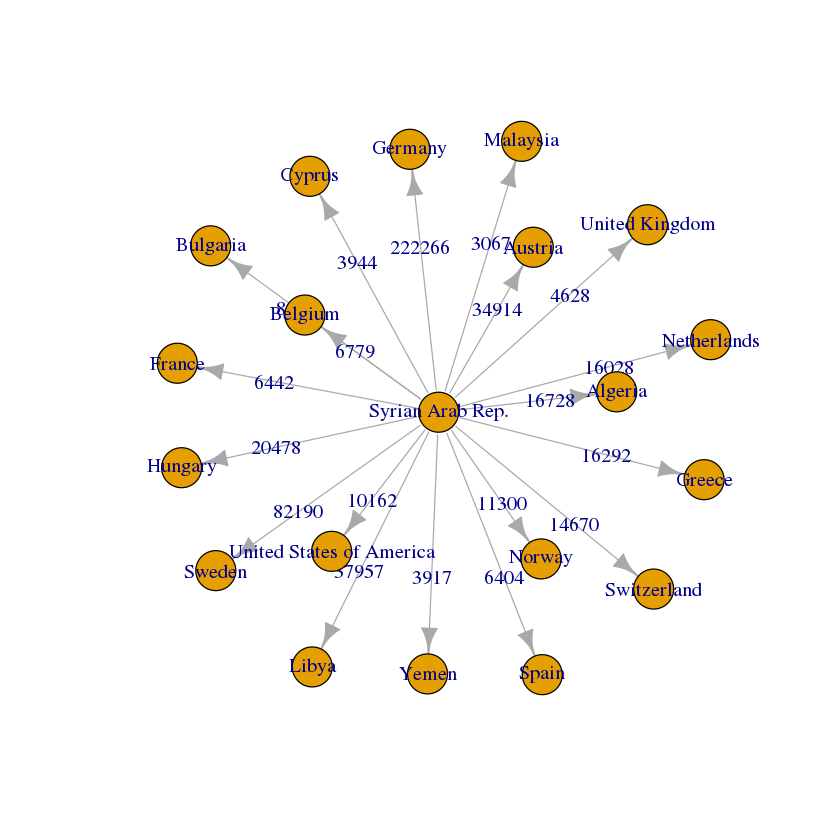

In [54]:
newdat <- unhcr %>% 
  group_by(Origin, Country) %>% 
  summarise(Refugees = sum(Asylum))

newsub <- newdat[newdat$Refugees >= 3000,]

met <- newsub[c(1,2,3)]
nw <- graph.data.frame(met, directed=TRUE)
plot(nw, edge.label = E(nw)$Refugees)

ad <- as_adjacency_matrix(nw,type="both",names=TRUE,sparse=FALSE,attr="Refugees");
V(nw)$name

chordNetwork(Data = ad, width = 700, height = 700, fontSize = 14, labels = V(nw)$name, labelDistance = 100)

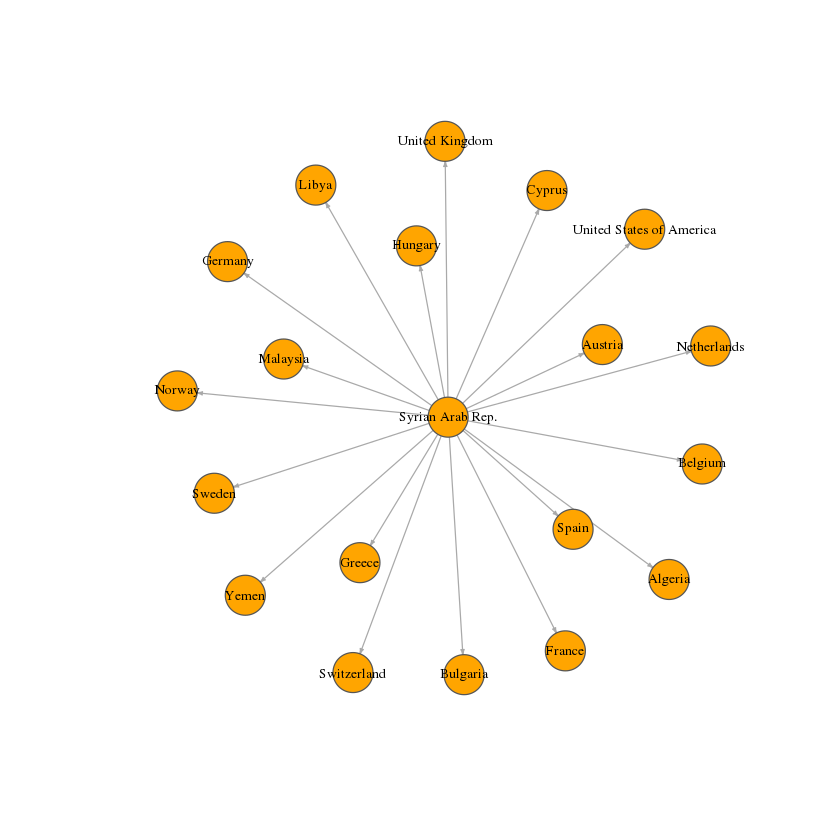

In [55]:
plot(nw, edge.arrow.size=.2, edge.curved=0,
     vertex.color="orange", vertex.frame.color="#555555",
     vertex.label=V(nw)$name, vertex.label.color="black",
     vertex.label.cex=.7) 

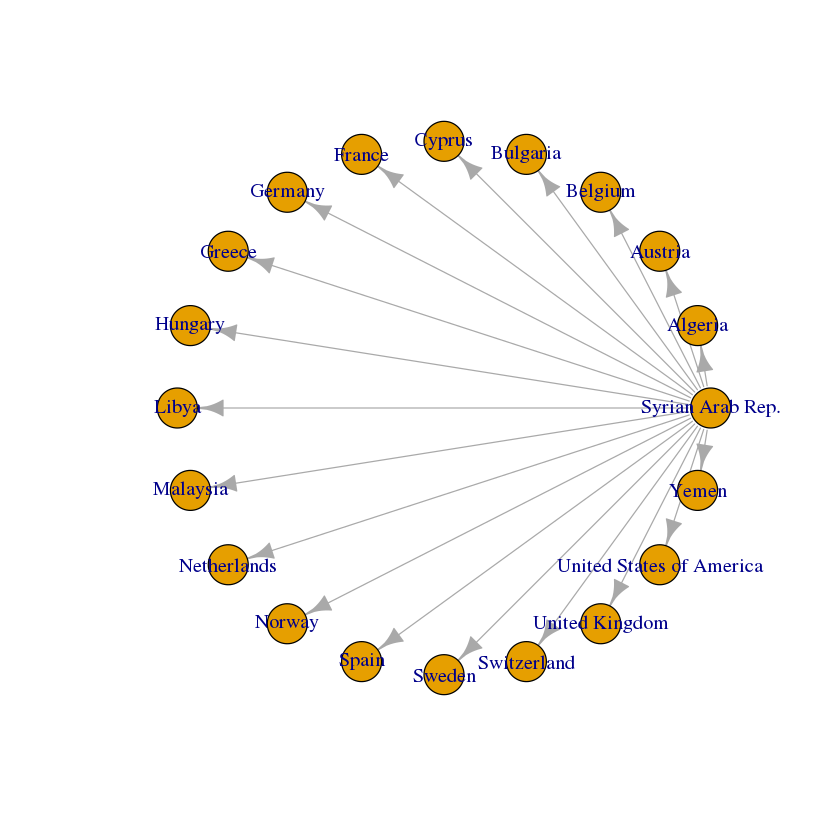

In [56]:
plot(nw, layout=layout.circle, vertex.color=V(nw)$color, vertex.label=V(nw)$number)

### Countries with a Large Number of Syrian Asylum Cases by Year

We notice Germany and Sweden stand out with the highest number of cases. 

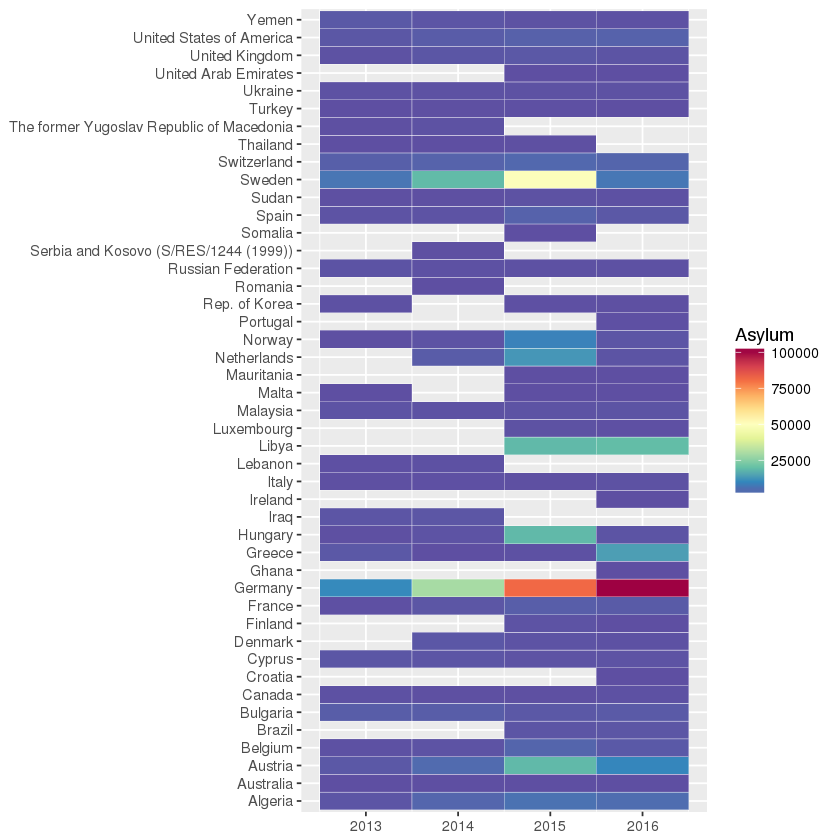

In [57]:
asylum <- unhcr %>% 
  group_by(Country, Year) %>% 
  summarise(Asylum = sum(Asylum)) %>%
  filter(Asylum > 100) %>%
  ggplot(aes(x=Year,y=Country)) + 
  geom_tile(aes(fill = Asylum),colour = "white") + 
  theme(axis.title.y=element_blank(),axis.title.x=element_blank(),legend.position="right") + 
  scale_fill_gradientn(colours=rev(brewer.pal(11,'Spectral')))

asylum

### Countries with a Large Numbers of Syrian Refugees by Year

We notice Turkey and Lebanon stand out with the highest number of refugees

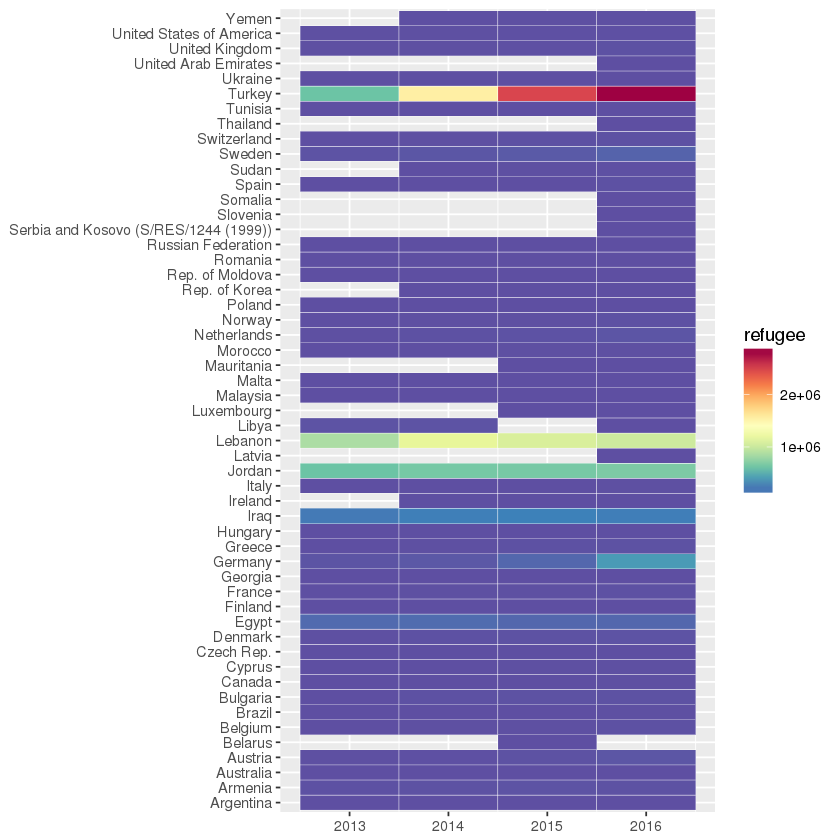

In [58]:
refugees <- unhcr %>% 
  group_by(Country, Year) %>% 
  summarise(refugee = sum(Refugees)) %>%
  filter(refugee > 100) %>%
  ggplot(aes(x=Year,y=Country)) + 
  geom_tile(aes(fill = refugee),colour = "white") + 
  theme(axis.title.y=element_blank(),axis.title.x=element_blank(),legend.position="right") + 
  scale_fill_gradientn(colours=rev(brewer.pal(11,'Spectral')))

refugees

#### Now let's just look at the top countries with Syrians seeking Asylum 

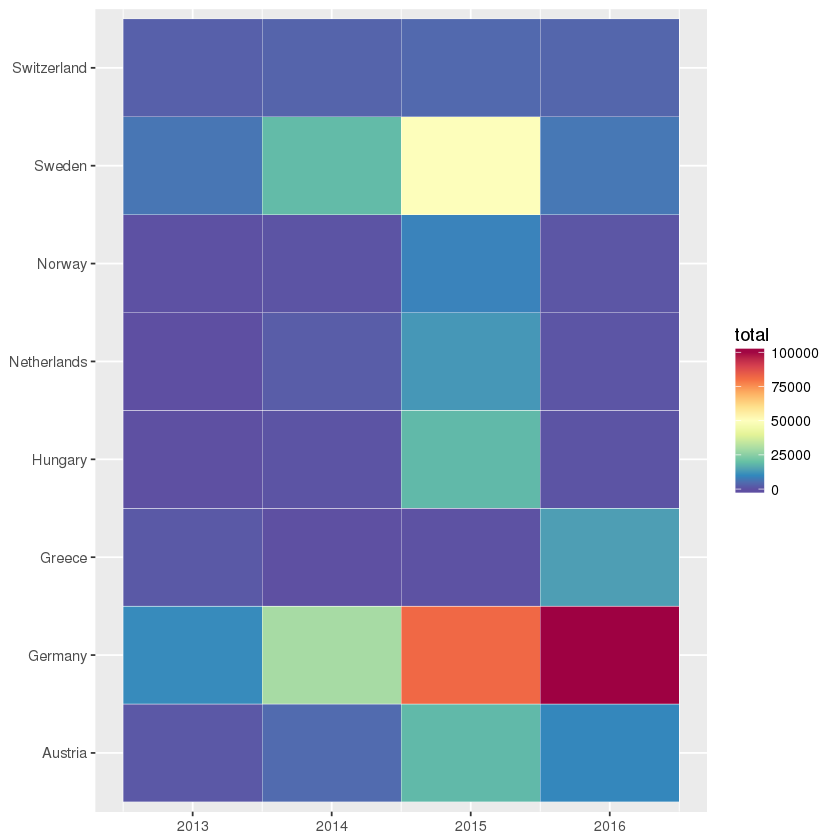

In [59]:
ggplot(data=data,aes(x=Year,y=Country)) + 
  geom_tile(aes(fill = total),colour = "white") + 
  theme(axis.title.y=element_blank(),axis.title.x=element_blank(),legend.position="right") + 
  scale_fill_gradientn(colours=rev(brewer.pal(11,'Spectral')))

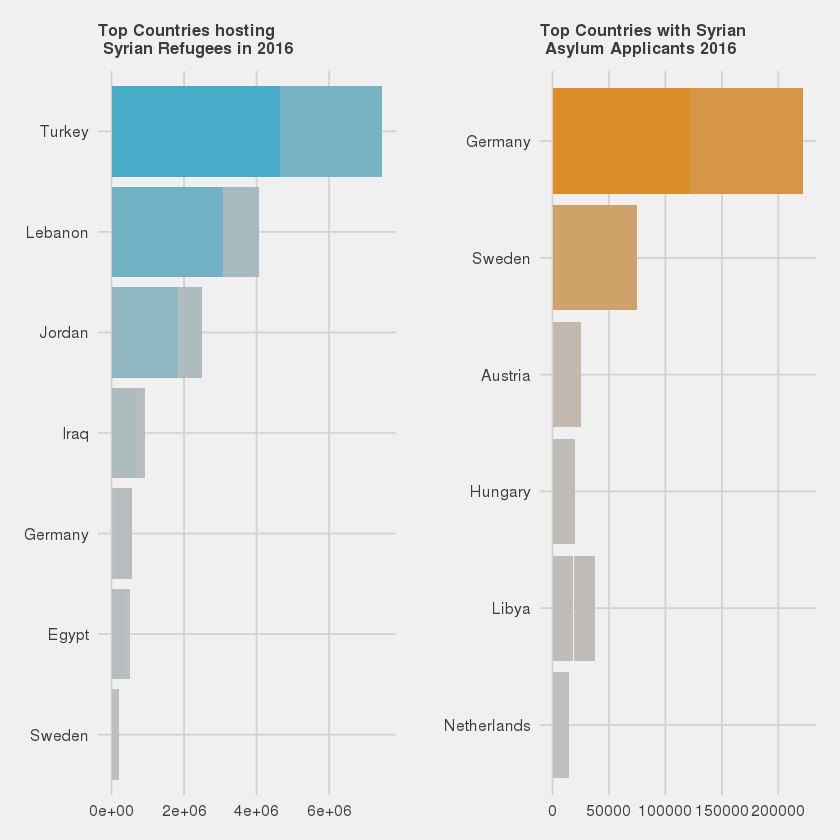

In [60]:
library(gridExtra)

g1<- unhcr %>% 
  group_by(Country, Year==2016) %>% 
  summarise(Refugees = sum(Refugees)) %>%
  filter(Refugees > 60000) %>%
  ggplot(aes(x=reorder(Country,Refugees),y=Refugees)) + 
  geom_bar(aes(fill=Refugees),stat='identity') + 
  coord_flip() + theme_fivethirtyeight() + 
  scale_fill_gradientn(name='',colors=colorRampPalette(c("gray","#46ACC8"))(10)) + 
  theme(legend.position='none',plot.title = element_text(size =10)) + 
  ggtitle('Top Countries hosting\n Syrian Refugees in 2016')

g2<-unhcr %>% 
  group_by(Country, Year==2016) %>% 
  summarise(Asylum = sum(Asylum)) %>%
  filter(Asylum > 15000) %>%
  ggplot(aes(x=reorder(Country,Asylum),y=Asylum)) + 
  geom_bar(aes(fill=Asylum),stat='identity') + 
  coord_flip() + theme_fivethirtyeight() + 
  scale_fill_gradientn(name='',colors=colorRampPalette(c("gray","#DD8D29"))(10)) + 
  theme(legend.position='none',plot.title = element_text(size =10)) + 
  ggtitle('Top Countries with Syrian\n Asylum Applicants 2016')

grid.arrange(g1,g2,ncol=2)

### Now let's import a world map and view the data spatially 

In [61]:
countries_map <-map_data("world")
world_map<-ggplot() + 
  geom_map(data = countries_map, 
           map = countries_map,aes(x = long, y = lat, map_id = region, group = group),
           fill = "white", color = "black", size = 0.1)



Warning message:
"Ignoring unknown aesthetics: x, y"

In [62]:
makeMapType<-function(year){
                temp <- data.frame(unhcr %>% 
                   dplyr::filter(Year==2016) %>% 
                   dplyr::group_by(Country) %>% 
                   dplyr::summarise(Refugees = sum(Refugees)) %>%
                   dplyr::rename(region=Country))

    res <- data.frame(left_join(countries_map,temp,by='region'))

    res$Refugees[is.na(res$Refugees)] <- 0
                      
    #pal='D'
    pal = "Reds"
    
    if(year==2016){
        breaks = c(exp(0),exp(100000),exp(500000))
        labels = c(50000,80000,500000)
        max<-2900000
    } 
    
    listPlot<-list()
    listPlot[[1]]<- ggplot() + 
    geom_polygon(data=res,aes(x = long, y = lat, group = group,fill=Refugees),colour = "white", size = 0.1) + 
#    scale_fill_viridis(name=paste0("by year"), option = pal, direction = 1,na.value = "grey40", limits = c(0, max))+
#    scale_fill_viridis(name=paste0("year"), option = pal, direction = 1,na.value = "grey40",limits = c(0, max),
#    breaks = breaks, labels = labels) + 
#    scale_fill_gradientn(colors = viridis_pal()(5), limits=c(10000, 1000000), 
#                       na.value = "#FDE725FF") +
    scale_fill_viridis(option="Viridis")+
    theme_fivethirtyeight() + 
    theme(legend.position=c(.85,1.05),
        legend.text=element_text(size=8),
        panel.grid.major = element_blank(),
        axis.text=element_blank(),
        axis.ticks=element_blank(),
        plot.title=element_text(face="bold",hjust=.012,vjust=.8,colour="#3C3C3C",size=20),
        plot.subtitle=element_text(size=10, hjust=0, face="italic", color="black")) + 
        labs(
        title=paste0("Countries hosting Syrian Refugees in ",year),
        subtitle="Top 10 Countries\nhosting Syrian Refugees\nSource: UNHCR")
       
       listPlot[[2]]<-temp %>% arrange(-Refugees) %>% head(10) %>%ggplot(aes(x=reorder(region,Refugees),y=Refugees)) + geom_histogram(stat='identity') + coord_flip() + theme_fivethirtyeight() + theme(axis.text.y = element_text(size=8))
       
       return(listPlot)
}

Warning message in viridis(256, alpha, begin, end, option):
"Option 'Viridis' does not exist. Defaulting to 'viridis'."Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

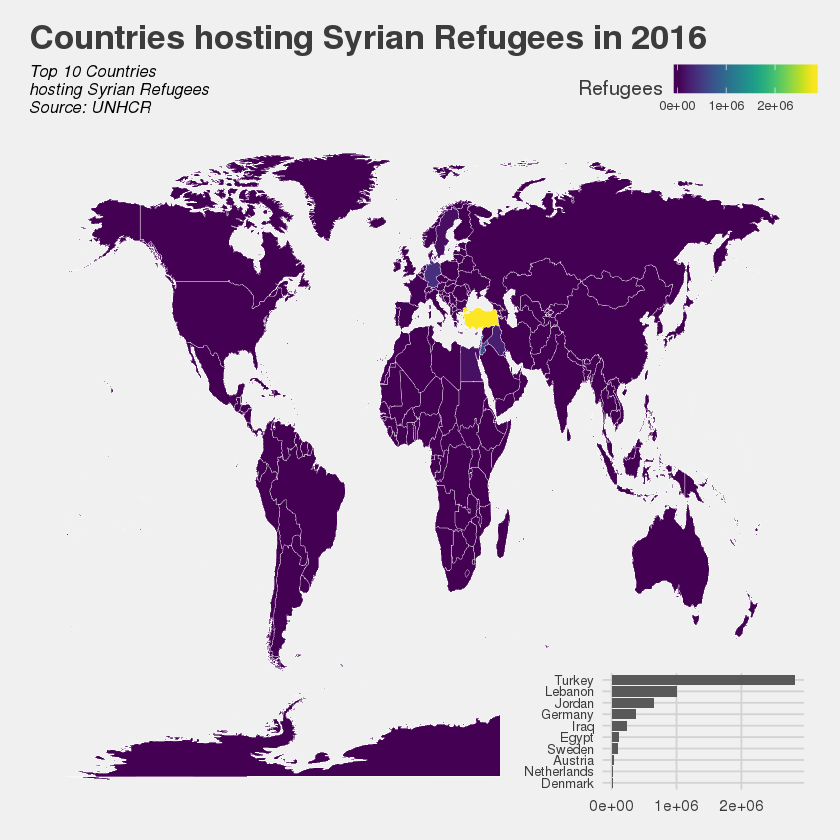

In [63]:
year_2016 <- makeMapType(2016)

year_2016[[1]] + annotation_custom(grob = ggplotGrob(year_2016[[2]]), xmin = 45, xmax = 215, ymin = -100, ymax = -50)